In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Load data
X, Y = load_breast_cancer(return_X_y=True)
print(f"Dataset shape: {X.shape}")
print(f"Features: {X.shape[1]}, Samples: {X.shape[0]}")

Dataset shape: (569, 30)
Features: 30, Samples: 569


In [12]:
# STEP 1: TRAIN-TEST SPLIT (CRITICAL!)
# Split data: 80% training, 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("=" * 60)
print("DATA SPLIT SUMMARY")
print("=" * 60)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size:  {X_test.shape[0]} samples")
print(f"Total: {X_train.shape[0] + X_test.shape[0]} samples")

DATA SPLIT SUMMARY
Training set size: 455 samples
Testing set size:  114 samples
Total: 569 samples


In [ ]:
# STEP 2: LINEAR REGRESSION - WRONG WAY (Training on entire dataset)
print("\n" + "=" * 60)
print("INCORRECT APPROACH (Training & Testing on SAME data)")
print("=" * 60)

lr_wrong = LinearRegression()
lr_wrong.fit(X, Y)
pred_wrong = lr_wrong.predict(X)

r2_wrong = r2_score(Y, pred_wrong)
rmse_wrong = np.sqrt(mean_squared_error(Y, pred_wrong))
mae_wrong = mean_absolute_error(Y, pred_wrong)

print(f"R² Score (Same Data): {r2_wrong:.4f}")
print(f"RMSE: {rmse_wrong:.4f}")
print(f"MAE: {mae_wrong:.4f}")
print("  WARNING: These metrics are OVERFITTING indicators!")


INCORRECT APPROACH (Training & Testing on SAME data)
R² Score (Same Data): 0.7743
RMSE: 0.2297
MAE: 0.1806
⚠️  WARNING: These metrics are OVERFITTING indicators!


In [14]:
# STEP 3: LINEAR REGRESSION - CORRECT WAY (Using Train-Test Split)
print("\n" + "=" * 60)
print("CORRECT APPROACH (Training on TRAIN data, Testing on TEST data)")
print("=" * 60)

lr_correct = LinearRegression()
lr_correct.fit(X_train, Y_train)

# Predictions on training set
pred_train_lr = lr_correct.predict(X_train)
r2_train_lr = r2_score(Y_train, pred_train_lr)
rmse_train_lr = np.sqrt(mean_squared_error(Y_train, pred_train_lr))

# Predictions on testing set (unseen data)
pred_test_lr = lr_correct.predict(X_test)
r2_test_lr = r2_score(Y_test, pred_test_lr)
rmse_test_lr = np.sqrt(mean_squared_error(Y_test, pred_test_lr))

print(f"\n--- TRAINING SET ---")
print(f"R² Score: {r2_train_lr:.4f}")
print(f"RMSE: {rmse_train_lr:.4f}")

print(f"\n--- TESTING SET (Unseen Data) ---")
print(f"R² Score: {r2_test_lr:.4f}")
print(f"RMSE: {rmse_test_lr:.4f}")
print(f"\n✓ If Testing R² is lower than Training R², this is NORMAL (overfitting detection)")


CORRECT APPROACH (Training on TRAIN data, Testing on TEST data)

--- TRAINING SET ---
R² Score: 0.7790
RMSE: 0.2272

--- TESTING SET (Unseen Data) ---
R² Score: 0.7271
RMSE: 0.2532

✓ If Testing R² is lower than Training R², this is NORMAL (overfitting detection)


# Pipeline with Hyperparameter Tuning using GridSearchCV
We will now use a Pipeline to combine preprocessing (StandardScaler) and model (KNeighborsRegressor), then use GridSearchCV to find the best hyperparameters using proper cross-validation on the TRAINING data only.

In [15]:
# Create Pipeline: StandardScaler + KNeighborsRegressor
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=5))
])

print("Pipeline created with:")
print("1. StandardScaler - Normalizes features")
print("2. KNeighborsRegressor - Makes predictions based on nearest neighbors")

Pipeline created with:
1. StandardScaler - Normalizes features
2. KNeighborsRegressor - Makes predictions based on nearest neighbors


In [16]:
# STEP 4: GridSearchCV - Find best hyperparameters on TRAINING data
print("\n" + "=" * 60)
print("HYPERPARAMETER TUNING with GridSearchCV")
print("=" * 60)

mod = GridSearchCV(
    estimator=pipe,
    param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
    cv=3
)

# Train ONLY on training data
mod.fit(X_train, Y_train)

print("Best parameters found:", mod.best_params_)
print(f"Best CV Score (on training): {mod.best_score_:.4f}")


HYPERPARAMETER TUNING with GridSearchCV


Best parameters found: {'model__n_neighbors': 5}
Best CV Score (on training): 0.8579


In [17]:
# STEP 5: Evaluate on TESTING SET (Unseen Data)
print("\n" + "=" * 60)
print("EVALUATION ON TEST SET (UNSEEN DATA)")
print("=" * 60)

# Predictions on training set
train_pred_knn = mod.predict(X_train)
train_r2_knn = r2_score(Y_train, train_pred_knn)
train_rmse_knn = np.sqrt(mean_squared_error(Y_train, train_pred_knn))

# Predictions on testing set
test_pred_knn = mod.predict(X_test)
test_r2_knn = r2_score(Y_test, test_pred_knn)
test_rmse_knn = np.sqrt(mean_squared_error(Y_test, test_pred_knn))

print(f"\n--- TRAINING SET (KNN) ---")
print(f"R² Score: {train_r2_knn:.4f}")
print(f"RMSE: {train_rmse_knn:.4f}")

print(f"\n--- TESTING SET (KNN - Unseen Data) ---")
print(f"R² Score: {test_r2_knn:.4f}")
print(f"RMSE: {test_rmse_knn:.4f}")


EVALUATION ON TEST SET (UNSEEN DATA)

--- TRAINING SET (KNN) ---
R² Score: 0.9277
RMSE: 0.1299

--- TESTING SET (KNN - Unseen Data) ---
R² Score: 0.8462
RMSE: 0.1901


In [18]:
# STEP 6: Compare ALL Models (Linear Regression vs KNN)
print("\n" + "=" * 60)
print("COMPARISON: LINEAR REGRESSION vs KNN")
print("=" * 60)

print("\n--- LINEAR REGRESSION ---")
print(f"Training R²: {r2_train_lr:.4f}")
print(f"Testing R²: {r2_test_lr:.4f}")

print("\n--- KNN (with GridSearchCV) ---")
print(f"Training R²: {train_r2_knn:.4f}")
print(f"Testing R²: {test_r2_knn:.4f}")

print("\n✓ BETTER MODEL = Higher Testing R² score")


COMPARISON: LINEAR REGRESSION vs KNN

--- LINEAR REGRESSION ---
Training R²: 0.7790
Testing R²: 0.7271

--- KNN (with GridSearchCV) ---
Training R²: 0.9277
Testing R²: 0.8462

✓ BETTER MODEL = Higher Testing R² score


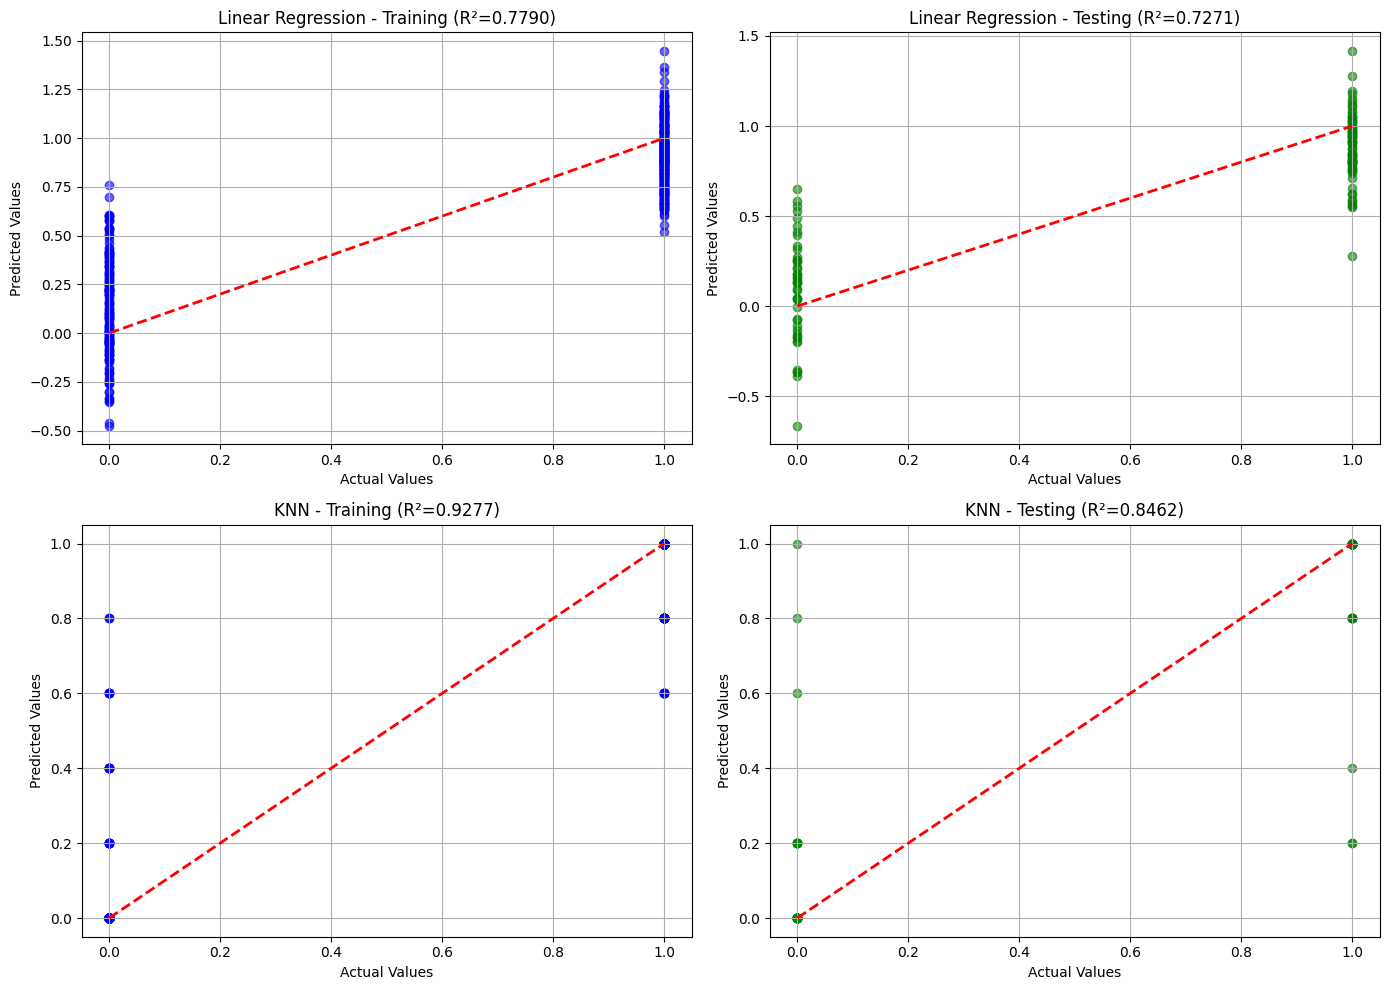

In [19]:
# STEP 7: Visualize Predictions - Compare Models
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Linear Regression - Training
axes[0, 0].scatter(Y_train, pred_train_lr, alpha=0.6, color='blue')
axes[0, 0].plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel("Actual Values")
axes[0, 0].set_ylabel("Predicted Values")
axes[0, 0].set_title(f"Linear Regression - Training (R²={r2_train_lr:.4f})")
axes[0, 0].grid(True)

# Linear Regression - Testing
axes[0, 1].scatter(Y_test, pred_test_lr, alpha=0.6, color='green')
axes[0, 1].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel("Actual Values")
axes[0, 1].set_ylabel("Predicted Values")
axes[0, 1].set_title(f"Linear Regression - Testing (R²={r2_test_lr:.4f})")
axes[0, 1].grid(True)

# KNN - Training
axes[1, 0].scatter(Y_train, train_pred_knn, alpha=0.6, color='blue')
axes[1, 0].plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', lw=2)
axes[1, 0].set_xlabel("Actual Values")
axes[1, 0].set_ylabel("Predicted Values")
axes[1, 0].set_title(f"KNN - Training (R²={train_r2_knn:.4f})")
axes[1, 0].grid(True)

# KNN - Testing
axes[1, 1].scatter(Y_test, test_pred_knn, alpha=0.6, color='green')
axes[1, 1].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
axes[1, 1].set_xlabel("Actual Values")
axes[1, 1].set_ylabel("Predicted Values")
axes[1, 1].set_title(f"KNN - Testing (R²={test_r2_knn:.4f})")
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [20]:
# Dataset Information
print(load_breast_cancer()['DESCR'])

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 